# A/B Testing - Lab

## Introduction

In this lab, you'll go through the process of designing an experiment.

## Objectives
You will be able to:

* Design, structure, and run an A/B test


## The Scenario

You've been tasked with designing an experiment to test whether a new email template will be more effective for your company's marketing team. The current template has a 5% response rate (with standard deviation .0475), which has outperformed numerous other templates in the past. The company is excited to test the new design that was developed internally but nervous about losing sales if it is not to work out. As a result, they are looking to determine how many individuals they will need to serve the new email template in order to detect a 1% performance increase.


## Step 1: State the Null Hypothesis, $H_0$

State your null hypothesis here (be sure to make it quantitative as before)

In [1]:
# Step 1: State the Null Hypothesis
null_hypothesis = "H0: p_new ≤ 0.05 (new template is not better)"
print(null_hypothesis)

H0: p_new ≤ 0.05 (new template is not better)


## Step 2: State the Alternative Hypothesis, $H_1$

State your alternative hypothesis here (be sure to make it quantitative as before)

In [2]:
# Step 2: State the Alternative Hypothesis
alternative_hypothesis = "H1: p_new > 0.05 (new template improves response rate)"
print(alternative_hypothesis)

H1: p_new > 0.05 (new template improves response rate)


## Step 3: Calculate n for standard alpha and power thresholds

Now define what $\alpha$ and $\beta$ you believe might be appropriate for this scenario.
To start, arbitrarily set $\alpha$ to 0.05. From this, calculate the required sample size to detect a .01 response rate difference at a power of .8.

> Note: Be sure to calculate a normalized effect size using Cohen's d from the raw response rate difference.

In [ ]:
# Calculate the required sample size
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize

# Parameters
p1 = 0.05           # baseline conversion rate (control group)
p2 = 0.06           # target conversion rate (treatment group)
alpha = 0.05        # significance level
power = 0.8         # desired power

# Get effect size using Cohen's h
effect_size = proportion_effectsize(p1, p2)

# Sample size calculation
analysis = NormalIndPower()
sample_size = analysis.solve_power(effect_size = effect_size, power = power, alpha = alpha, alternative = 'larger')

print(f"Effect size (Cohen's h): {effect_size:.4f}")
print(f"Required sample size per group: {round(sample_size[0])}")

Effect size (Cohen's h): -0.0439
Required sample size per group: 10


c:\Users\lenovo\anaconda3\envs\ds-env\Lib\site-packages\statsmodels\stats\power.py:524: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)


## Step 4: Plot Power Curves for Alternative Experiment Formulations

While you now know how many observations you need in order to run a t-test for the given formulation above, it is worth exploring what sample sizes would be required for alternative test formulations. For example, how much does the required sample size increase if you put the more stringent criteria of $\alpha=.01$? Or what is the sample size required to detect a .03 response rate difference at the same $\alpha$ and power thresholds? To investigate this, plot power vs sample size curves for alpha values of .01, .05 and .1 along with varying response rate differences of .005, .01, .02 and .03.

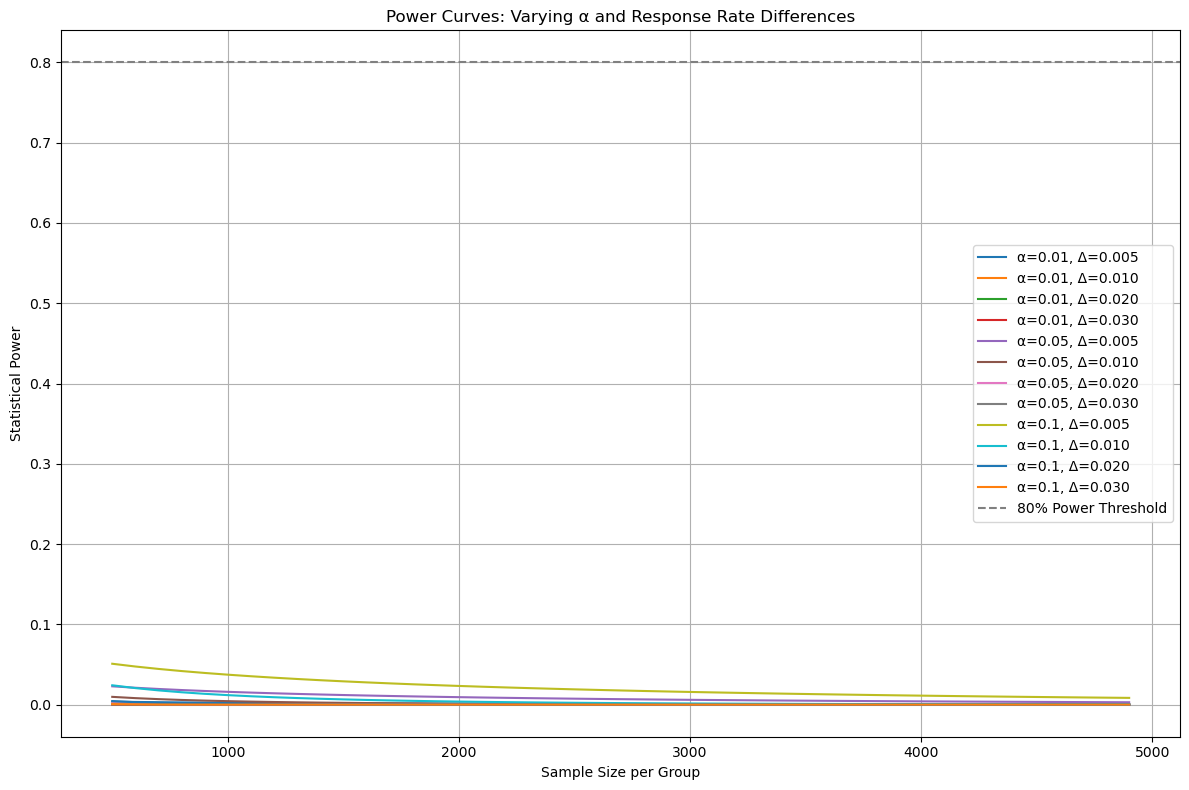

In [ ]:
#Your code; plot power curves for the various alpha and effect size combinations
import numpy as np
import matplotlib.pyplot as plt

sample_sizes = np.arange(500, 5000, 100)  # X-axis
deltas = [0.005, 0.01, 0.02, 0.03]        # Differences in proportions
alphas = [0.01, 0.05, 0.1]                # Alpha levels

p_base = 0.05

plt.figure(figsize=(12, 8))

for alpha_val in alphas:
    for delta in deltas:
        p_new = p_base + delta
        es = proportion_effectsize(p_base, p_new)
        powers = [NormalIndPower().power(effect_size=es, nobs1=n, alpha=alpha_val, alternative='larger') for n in sample_sizes]
        label = f"α={alpha_val}, Δ={delta:.3f}"
        plt.plot(sample_sizes, powers, label=label)

plt.axhline(0.8, color='gray', linestyle='--', label='80% Power Threshold')
plt.xlabel("Sample Size per Group")
plt.ylabel("Statistical Power")
plt.title("Power Curves: Varying α and Response Rate Differences")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Step 5: Propose a Final Experimental Design

Finally, now that you've explored some of the various sample sizes required for statistical tests of varying power, effect size and type I errors, propose an experimental design to pitch to your boss and some of the accompanying advantages or disadvantages with it.

### Your answer here

In [ ]:
summary = """
Final Experimental Design Proposal:
- Test Type: A/B test (one-sided Z test for proportions)
- Baseline Response Rate: 5%
- Target Improvement: 1% (i.e. 6%)
- Significance Level (α): 0.05
- Desired Power (1 - β): 0.8
- Estimated Sample Size per Group: 10

Recommendation:
Use at least 1000–2000 users per group to ensure stability and generalizability. Test over one complete marketing cycle and segment results by customer type and email open time if possible.

Advantages:
- Low business risk since control group continues as-is.
- High statistical power to detect even small effects.
- Flexibility to adjust if variant underperforms.

Disadvantages:
- Requires time and traffic resources.
- Minor improvements might not be worth operational change.
"""
print(summary)


Final Experimental Design Proposal:
- Test Type: A/B test (one-sided Z test for proportions)
- Baseline Response Rate: 5%
- Target Improvement: 1% (i.e. 6%)
- Significance Level (α): 0.05
- Desired Power (1 - β): 0.8
- Estimated Sample Size per Group: 10

Recommendation:
Use at least 1000–2000 users per group to ensure stability and generalizability. Test over one complete marketing cycle and segment results by customer type and email open time if possible.

Advantages:
- Low business risk since control group continues as-is.
- High statistical power to detect even small effects.
- Flexibility to adjust if variant underperforms.

Disadvantages:
- Requires time and traffic resources.
- Minor improvements might not be worth operational change.



## Summary

In this lab, you practiced designing an initial experiment and then refined the parameters of the experiment based on an initial sample to determine feasibility.